## Human Activity Recognition System-Dhilip Vasanth

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___


## Data Size :
> 27 MB


# Quick overview of the dataset :


* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

Given a new datapoint we have to predict the Activity

In [77]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [78]:
with open("UCI_HAR_Dataset/features.txt") as f:
    features=[line.split()[1] for line in f.readlines()]
print("No. of features in dataset:{}".format(len(features)))

No. of features in dataset:561


## Obtain the  train data 

In [79]:
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)
y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train=X_train
train["Activity"]=y_train
train["Actvity-name"]=y_train_labels
train.head(1)

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,subject,Activity,Actvity-name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


## Obtain the test data

In [80]:
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)
y_test = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
test=X_test
test["Activity"]=y_test
test["Actvity-name"]=y_test_labels
test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,subject,Activity,Actvity-name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,1,5,STANDING


In [81]:
traindata=pd.read_csv("train.csv")
traindata.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [82]:
testdata=pd.read_csv("test.csv")
testdata.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


## Data Cleaning

### 1.Checking whether there a duplicate values in the datset

In [84]:
print('No of duplicates in train: {}'.format(sum(traindata.duplicated())))

No of duplicates in train: 0


### 2. Checking whether there is null values in the dataset

In [85]:
print('No of duplicates in train: {}'.format((traindata.isnull().values.sum())))

No of duplicates in train: 0


### 3. checking wheather the dataset are balanced o

In [86]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

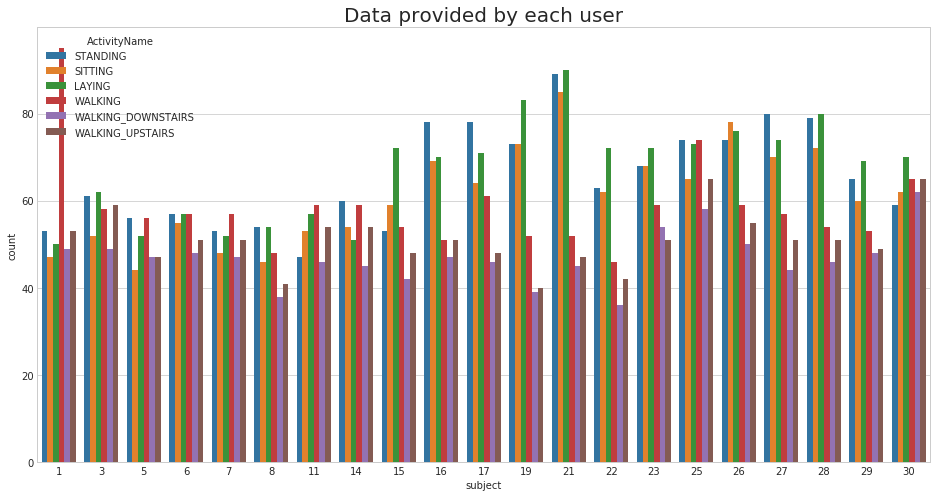

In [87]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = traindata)
plt.show()

> We have got almost same number of reading from all the subjects

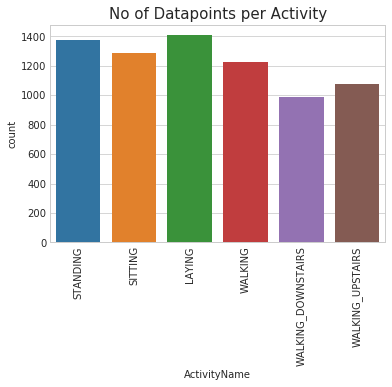

In [88]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(traindata.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 


+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.


### 2. Stationary and Moving activities are completely different

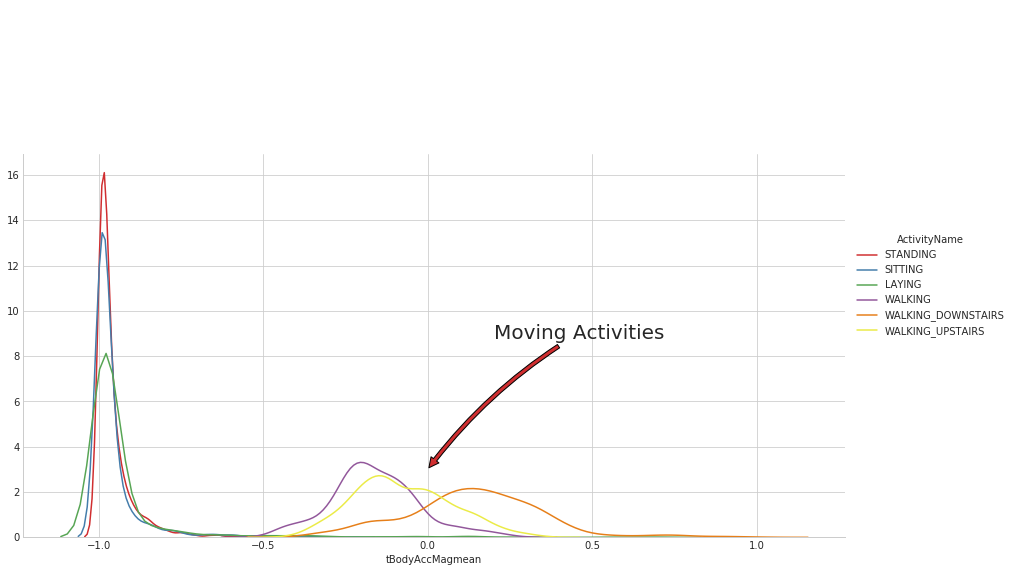

In [89]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(traindata, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

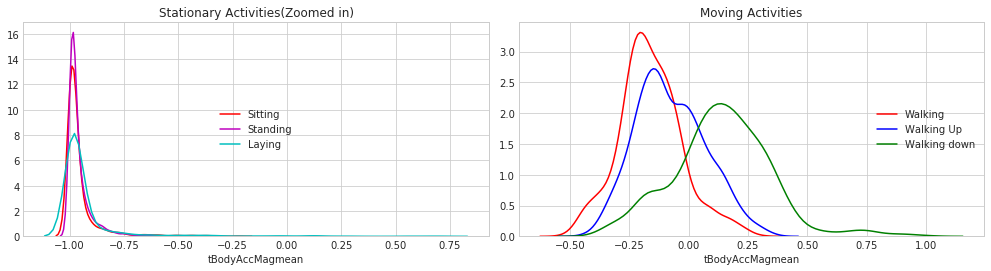

In [90]:
df1=traindata[traindata["Activity"]==1]
df2=traindata[traindata["Activity"]==2]
df3=traindata[traindata["Activity"]==3]
df4=traindata[traindata["Activity"]==4]
df5=traindata[traindata["Activity"]==5]
df6=traindata[traindata["Activity"]==6]
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')

plt.legend(loc='center')
plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

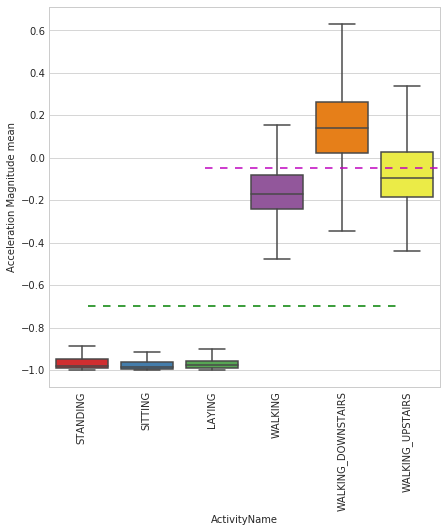

In [91]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=traindata, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

> __ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters

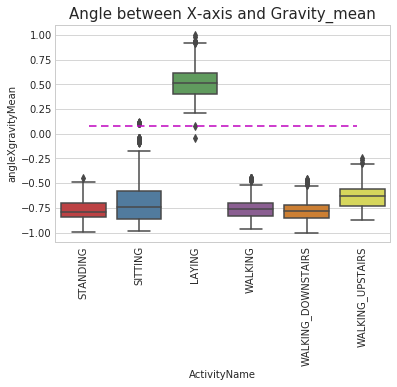

In [92]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=traindata)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

> __ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

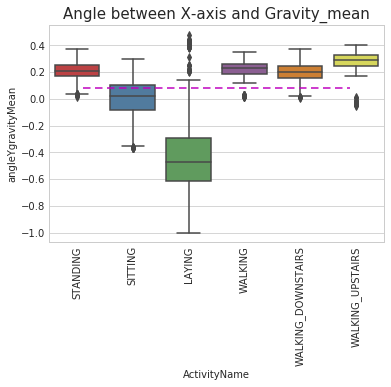

In [93]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data=traindata)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

# Apply t-sne on the data 

In [78]:
def tsne(x_data,y_data,perplexites,n_iter=1000,img_name_prefix='t-sne'):
    for perplexity in perplexites:
        x_reduced=TSNE(verbose=True,perplexity=perplexity).fit_transform(x_data)
        df={"x":x_reduced[:,0],"y":x_reduced[:,1],'label':y_data}
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')
        

In [83]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.174s...
[t-SNE] Computed neighbors for 7352 samples in 39.640s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 124.7255096, gradient norm = 0.0244160 (50 iterations in 4.535s)
[t-SNE] Iteration 100: error = 106.8754196, gradient norm = 0.0294856 (50 iterations in

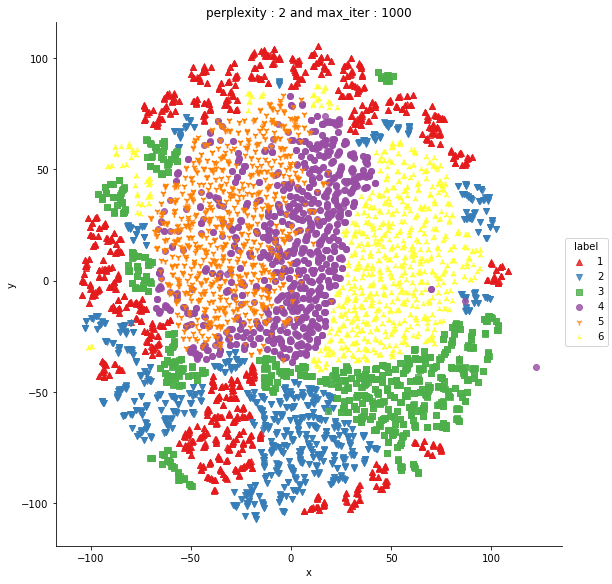

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.200s...
[t-SNE] Computed neighbors for 7352 samples in 41.703s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.062s
[t-SNE] Iteration 50: error = 113.9845276, gradient norm = 0.0245787 (50 iterations in 2.946s)
[t-SNE] Iteration 100: error = 97.1971741, gradient norm = 0.0153668 (50 iteratio

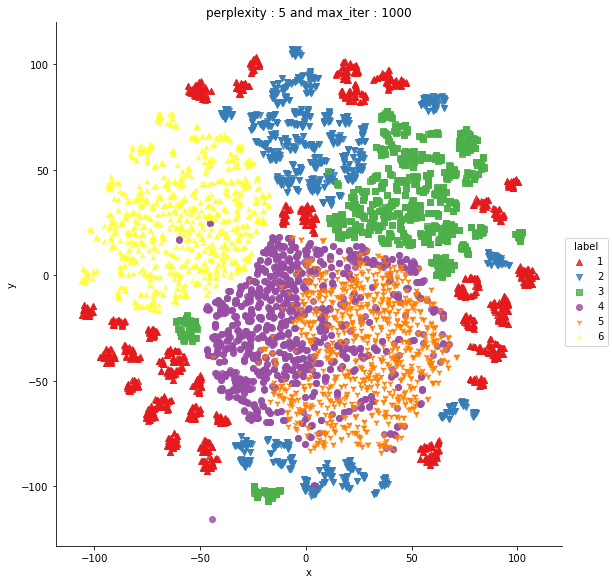

Done

performing tsne with perplexity 15 and with 1000 iterations at max
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.284s...
[t-SNE] Computed neighbors for 7352 samples in 43.681s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.218608
[t-SNE] Computed conditional probabilities in 0.211s
[t-SNE] Iteration 50: error = 100.6006927, gradient norm = 0.0237331 (50 iterations in 3.033s)
[t-SNE] Iteration 100: error = 86.6368866, gradient norm = 0.0070057 (50 iterati

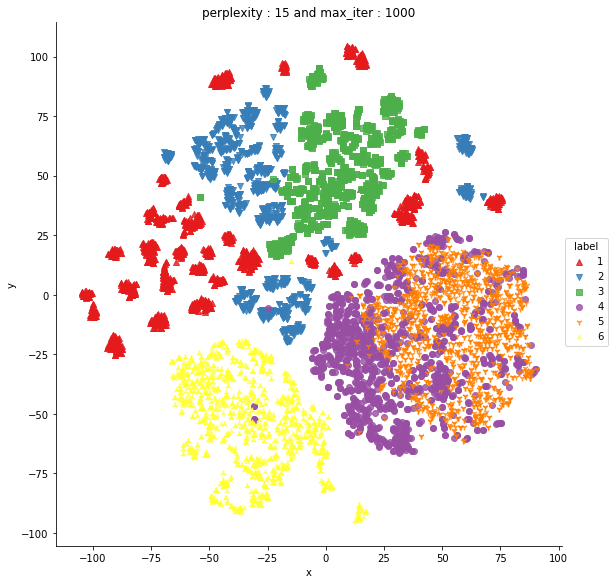

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.236s...
[t-SNE] Computed neighbors for 7352 samples in 45.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.206s
[t-SNE] Iteration 50: error = 97.6425018, gradient norm = 0.0164003 (50 iterations in 3.848s)
[t-SNE] Iteration 100: error = 84.5933075, gradient norm = 0.0077020 (50 iteratio

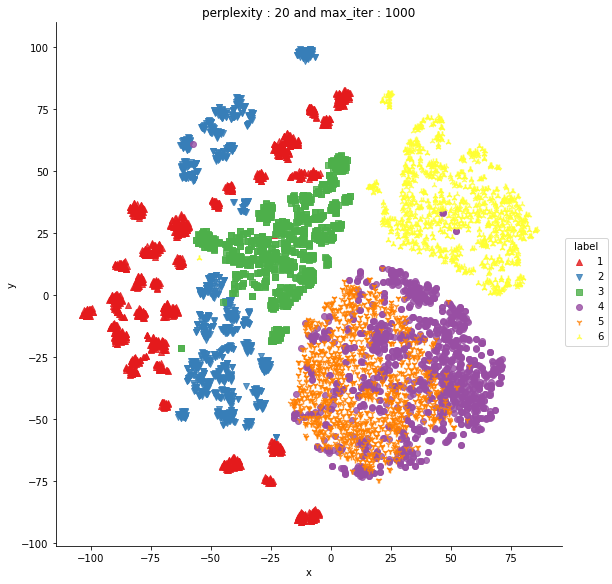

Done

performing tsne with perplexity 25 and with 1000 iterations at max
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.218s...
[t-SNE] Computed neighbors for 7352 samples in 45.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.315663
[t-SNE] Computed conditional probabilities in 0.287s
[t-SNE] Iteration 50: error = 94.5697861, gradient norm = 0.0237674 (50 iterations in 4.576s)
[t-SNE] Iteration 100: error = 82.3109283, gradient norm = 0.0071870 (50 iteratio

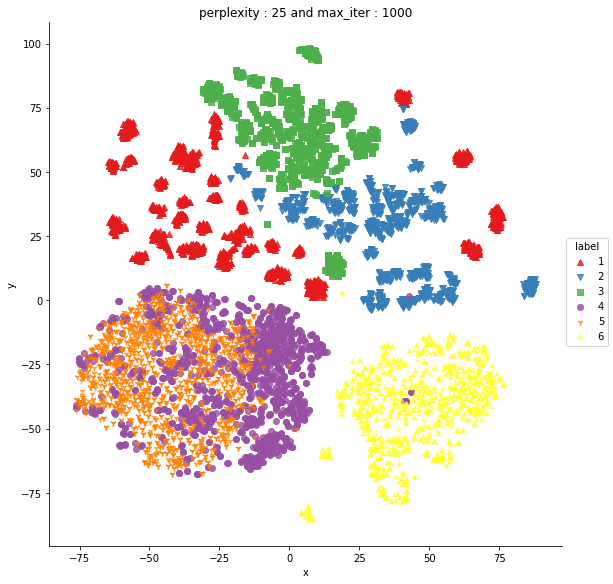

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.253s...
[t-SNE] Computed neighbors for 7352 samples in 45.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.214s
[t-SNE] Iteration 50: error = 97.6679840, gradient norm = 0.0201663 (50 iterations in 4.305s)
[t-SNE] Iteration 100: error = 83.9066925, gradient norm = 0.0063866 (50 iteratio

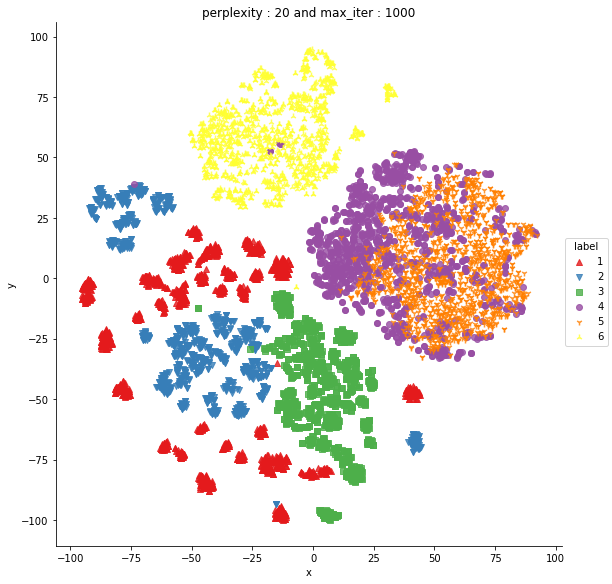

Done

performing tsne with perplexity 25 and with 1000 iterations at max
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.159s...
[t-SNE] Computed neighbors for 7352 samples in 44.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.315663
[t-SNE] Computed conditional probabilities in 0.268s
[t-SNE] Iteration 50: error = 94.8601074, gradient norm = 0.0176448 (50 iterations in 5.816s)
[t-SNE] Iteration 100: error = 82.2164078, gradient norm = 0.0103615 (50 iteratio

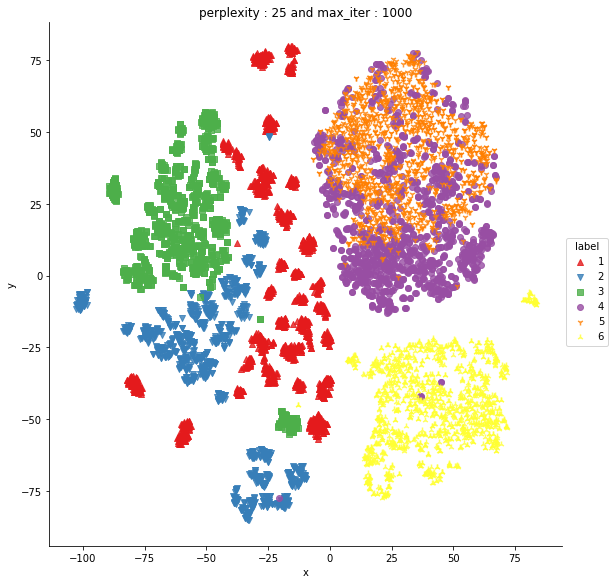

Done

performing tsne with perplexity 30 and with 1000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.080s...
[t-SNE] Computed neighbors for 7352 samples in 47.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] Computed conditional probabilities in 0.475s
[t-SNE] Iteration 50: error = 92.7258301, gradient norm = 0.0176590 (50 iterations in 4.124s)
[t-SNE] Iteration 100: error = 80.8472748, gradient norm = 0.0055322 (50 iteratio

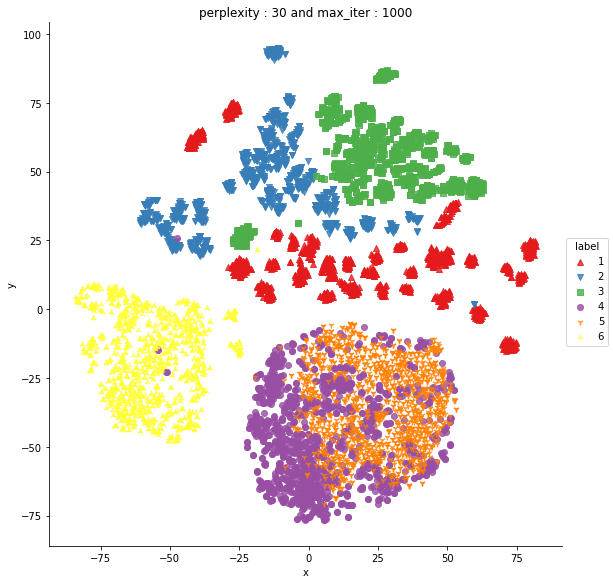

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.106s...
[t-SNE] Computed neighbors for 7352 samples in 42.975s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.518s
[t-SNE] Iteration 50: error = 86.7488327, gradient norm = 0.0156677 (50 iterations in 3.789s)
[t-SNE] Iteration 100: error = 75.9340668, gradient norm = 0.0056734 (50 iterati

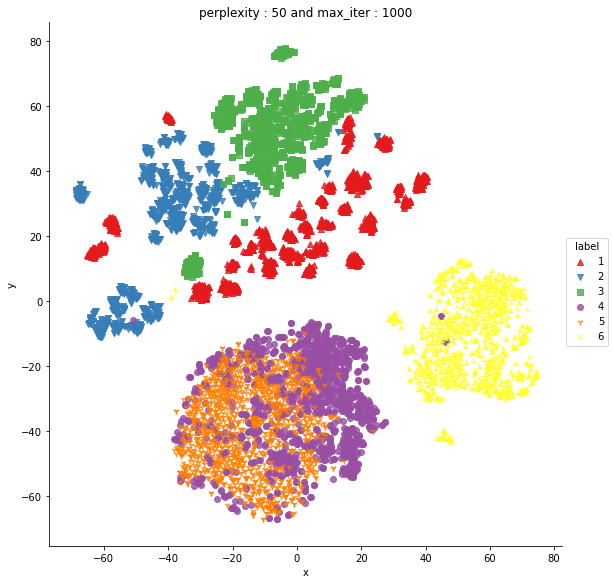

Done

performing tsne with perplexity 100 and with 1000 iterations at max
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.201s...
[t-SNE] Computed neighbors for 7352 samples in 44.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.559265
[t-SNE] Computed conditional probabilities in 1.028s
[t-SNE] Iteration 50: error = 76.7452087, gradient norm = 0.0319870 (50 iterations in 5.602s)
[t-SNE] Iteration 100: error = 68.5834579, gradient norm = 0.0033811 (50 iterat

In [ ]:
X_data=traindata.drop(["Activity","ActivityName","subject"],axis=1)
Y_data=traindata["Activity"]
perform_tsne(X_data=X_data,y_data=Y_data,perplexities=[2,5,15,20,25,20,25,30,50,100])

## Classical Machine learning model implemenation

In [94]:
X_train_data=traindata.drop(["Activity","ActivityName","subject"],axis=1)
Y_train_data=traindata["Activity"]

In [95]:
print('X_train and y_train : ({},{})'.format(X_train_data.shape, Y_train_data.shape))


X_train and y_train : ((7352, 561),(7352,))


In [96]:
X_test_data=testdata.drop(["Activity","ActivityName","subject"],axis=1)
Y_test_data=testdata["Activity"]

In [97]:
print('X_test  and y_test  : ({},{})'.format(X_test_data.shape, Y_test_data.shape))

X_test  and y_test  : ((2947, 561),(2947,))


### Function to plot the confusion matrix

In [98]:
def plot_confusion_matrix(y_actual,y_pred):
    labels=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS',\
                       'SITTING','STANDING','LAYING']
    
    Confusion=confusion_matrix(y_actual,y_pred)
    precision=(Confusion/Confusion.sum(axis=0))
    Recall=((Confusion.T/Confusion.sum(axis=1)).T)
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(Confusion, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(precision, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
 
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(Recall, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    plt.show()

## Logistic Regression with grid search cv

In [110]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
grid_result=log_reg_grid.fit(X_data,Y_data)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   15.4s finished
C:\Users\fsdq-\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [111]:
log_reg_grid.best_params_

{'C': 1, 'penalty': 'l2'}

C:\Users\fsdq-\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-------------------- Confusion matrix --------------------
-------------------- Precision matrix (Columm Sum=1) --------------------


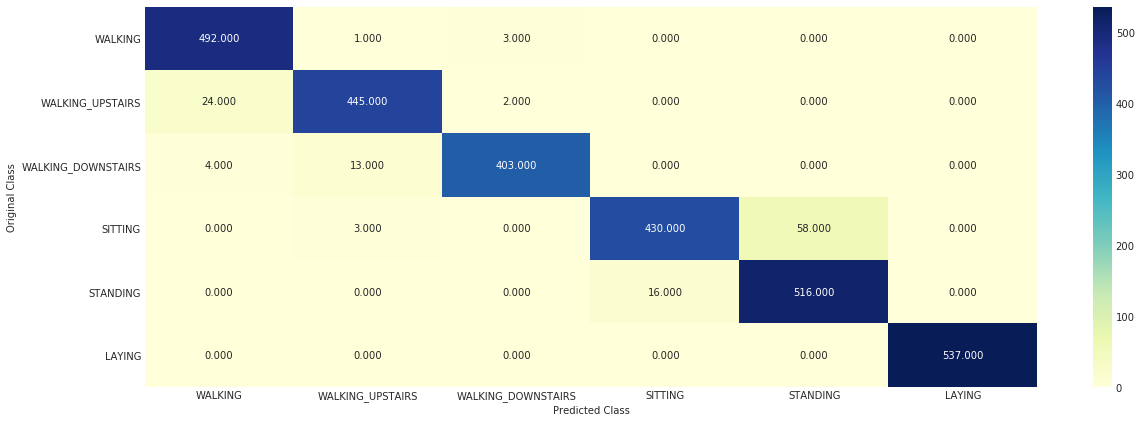

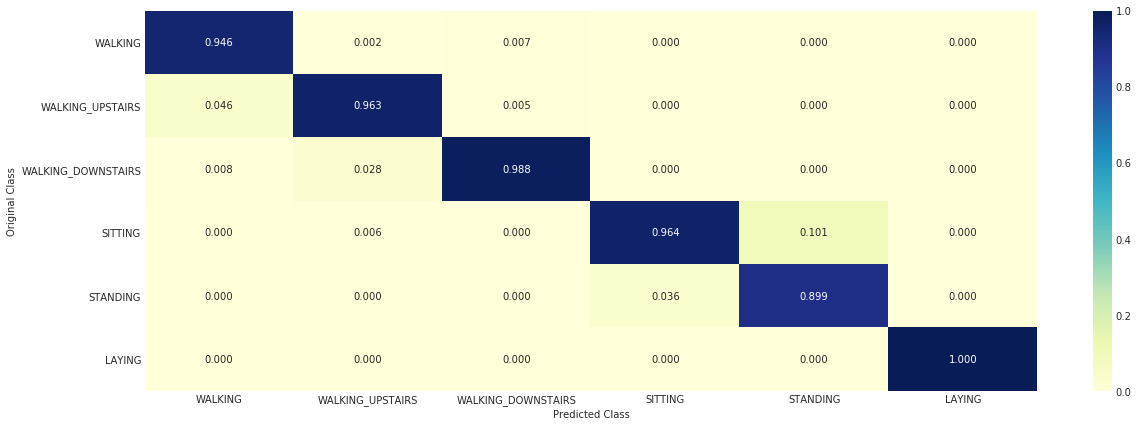

-------------------- Recall matrix (Row sum=1) --------------------


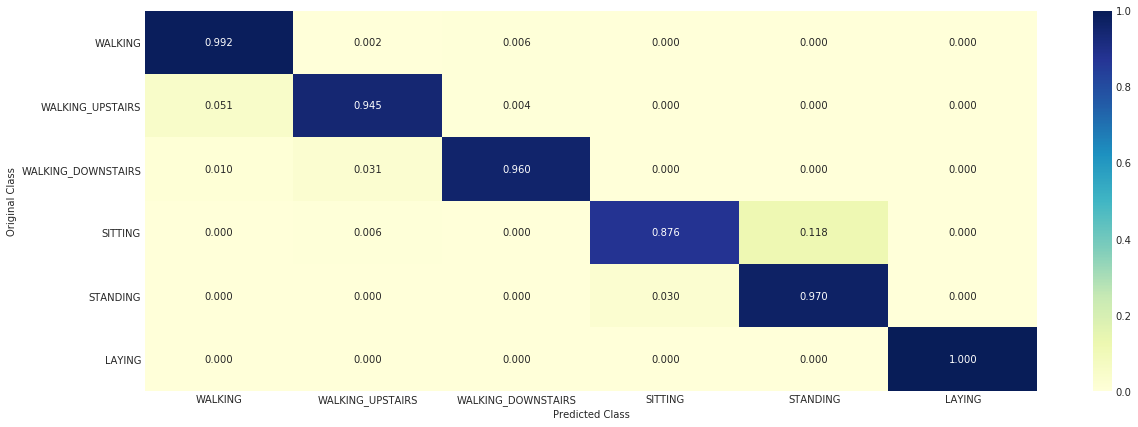

The Model of Accuracy score: 0.9579233118425518
<function confusion_matrix at 0x00000207705417B8>


In [125]:
clf=LogisticRegression(C=1,penalty="l2")
train=clf.fit(X_train_data,Y_train_data)
predict=clf.predict(X_test_data)
test_accuracy=accuracy_score(Y_test_data,predict)
plot_confusion_matrix(Y_test_data,predict)
print("The Model of Accuracy score:",test_accuracy)
print(confusion_matrix)


In [119]:
confusion_matrix(Y_test_data,predict)

array([[492,   1,   3,   0,   0,   0],
       [ 24, 445,   2,   0,   0,   0],
       [  4,  13, 403,   0,   0,   0],
       [  0,   3,   0, 430,  58,   0],
       [  0,   0,   0,  16, 516,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

## Linear SVM

In [133]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc= GridSearchCV(lr_svc, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
grid_result=lr_svc.fit(X_data,Y_data)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   39.4s finished
C:\Users\fsdq-\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [134]:
grid_result.best_params_

{'C': 0.5}

C:\Users\fsdq-\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------- Confusion matrix --------------------
-------------------- Precision matrix (Columm Sum=1) --------------------


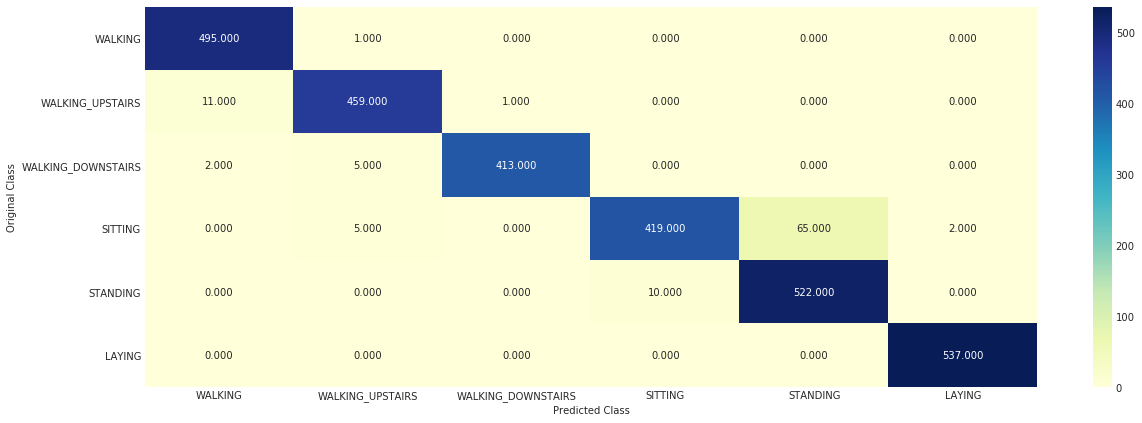

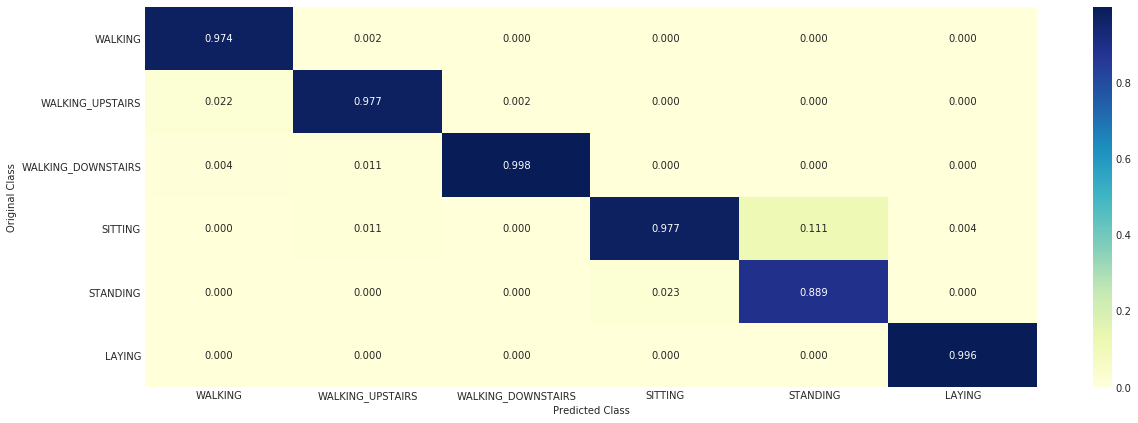

-------------------- Recall matrix (Row sum=1) --------------------


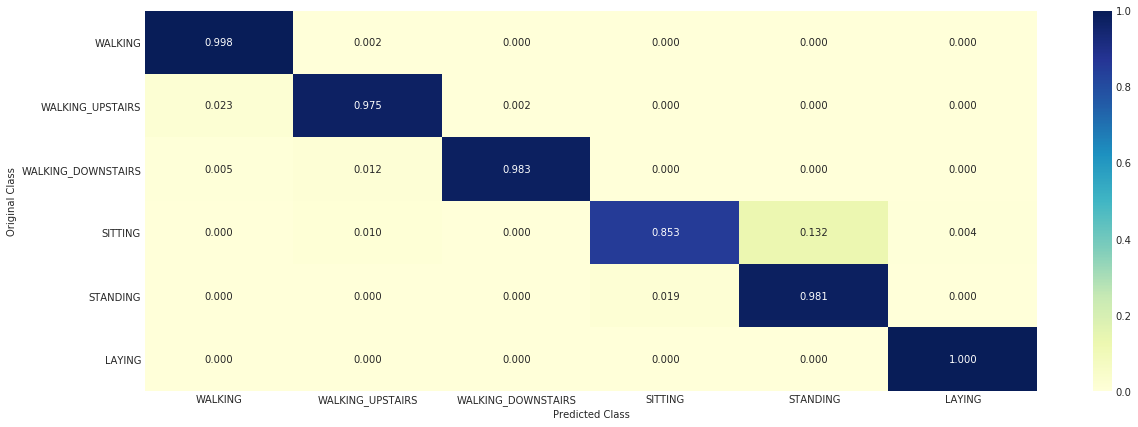

The Model of Accuracy score: 0.9653885307091958
<function confusion_matrix at 0x00000207705417B8>


In [135]:
clf=LinearSVC(C=10)
train=clf.fit(X_train_data,Y_train_data)
predict=clf.predict(X_test_data)
test_accuracy=accuracy_score(Y_test_data,predict)
plot_confusion_matrix(Y_test_data,predict)
print("The Model of Accuracy score:",test_accuracy)
print(confusion_matrix)

## Kernel SVM 

In [138]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
grid_result=rbf_svm_grid.fit(X_train_data,Y_train_data)

In [139]:
grid_result.best_params_

{'C': 16, 'gamma': 0.0078125}

-------------------- Confusion matrix --------------------
-------------------- Precision matrix (Columm Sum=1) --------------------


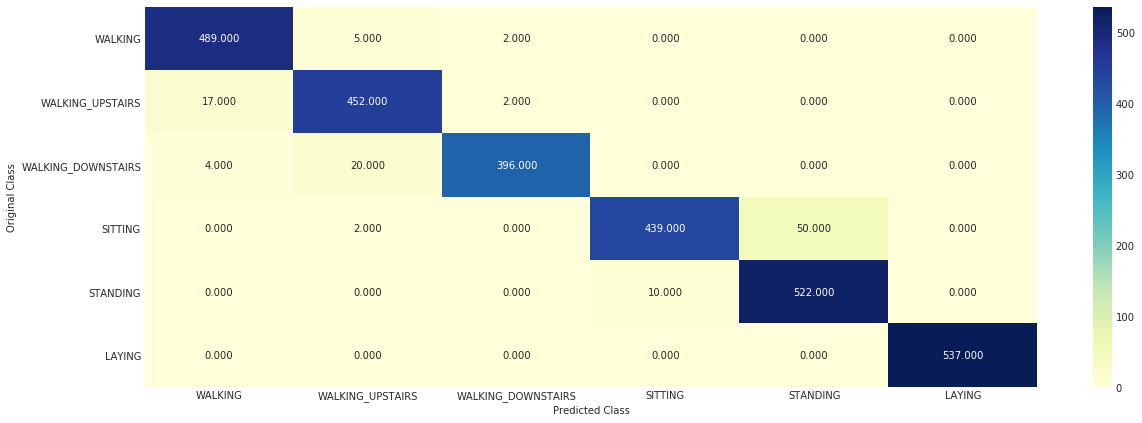

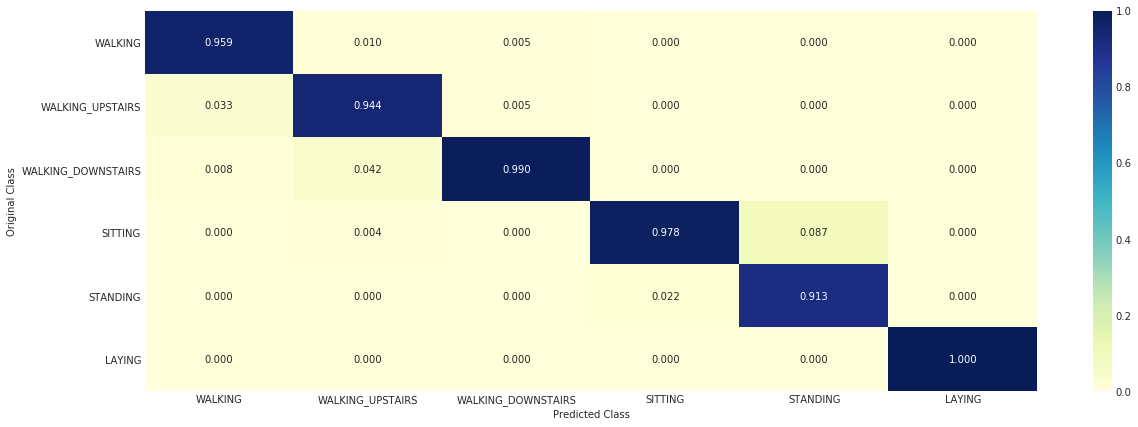

-------------------- Recall matrix (Row sum=1) --------------------


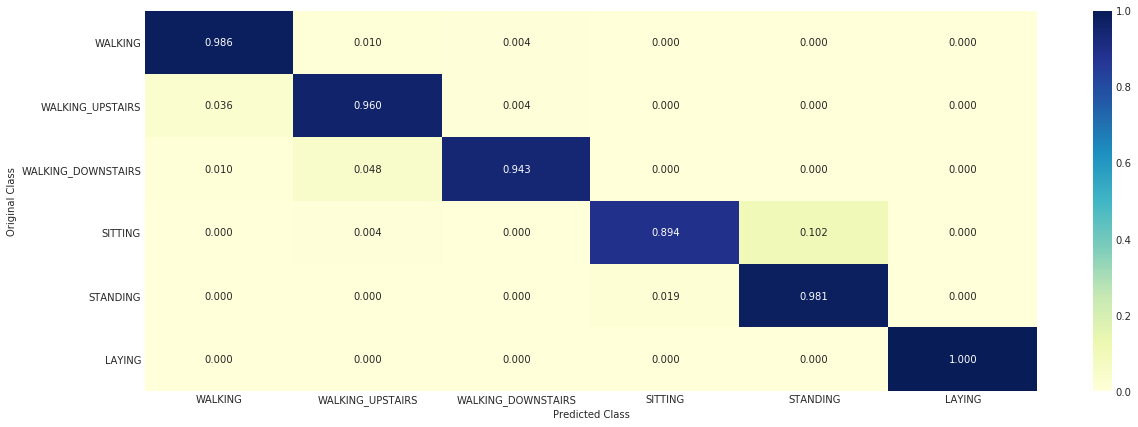

The Model of Accuracy score: 0.9619952494061758
<function confusion_matrix at 0x00000207705417B8>


In [140]:
clf=SVC(C=10)
train=clf.fit(X_train_data,Y_train_data)
predict=clf.predict(X_test_data)
test_accuracy=accuracy_score(Y_test_data,predict)
plot_confusion_matrix(Y_test_data,predict)
print("The Model of Accuracy score:",test_accuracy)
print(confusion_matrix)

## 4. Decision Trees with GridSearchCV

In [142]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
grid_result=dt_grid.fit(X_train_data,Y_train_data)

In [143]:
grid_result.best_params_

{'max_depth': 9}

-------------------- Confusion matrix --------------------
-------------------- Precision matrix (Columm Sum=1) --------------------


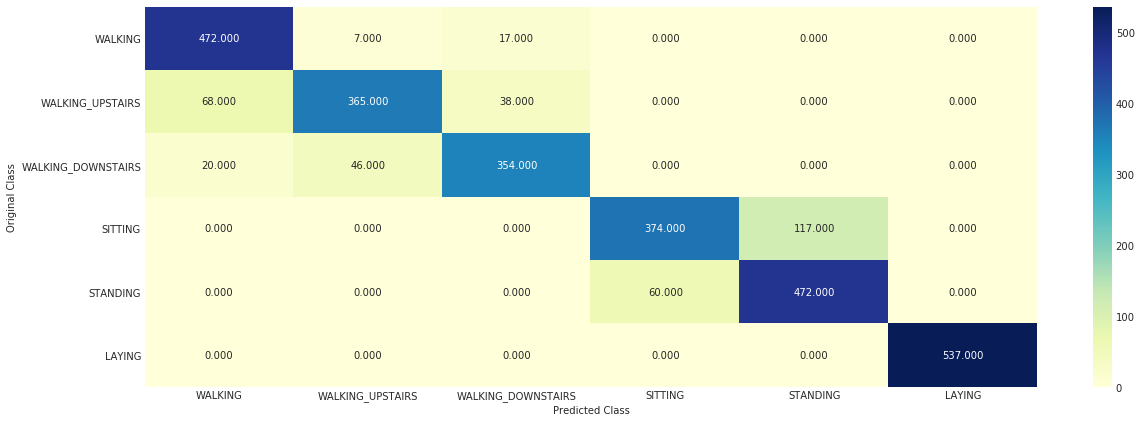

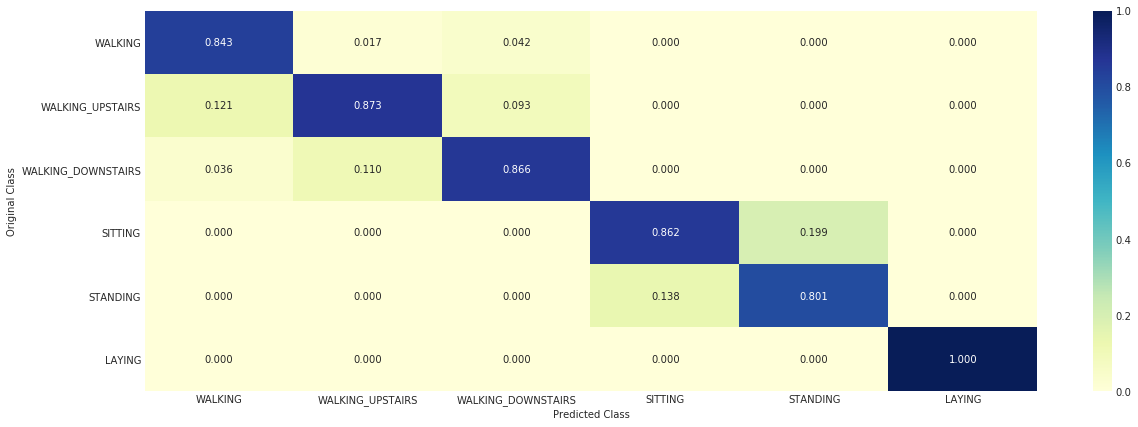

-------------------- Recall matrix (Row sum=1) --------------------


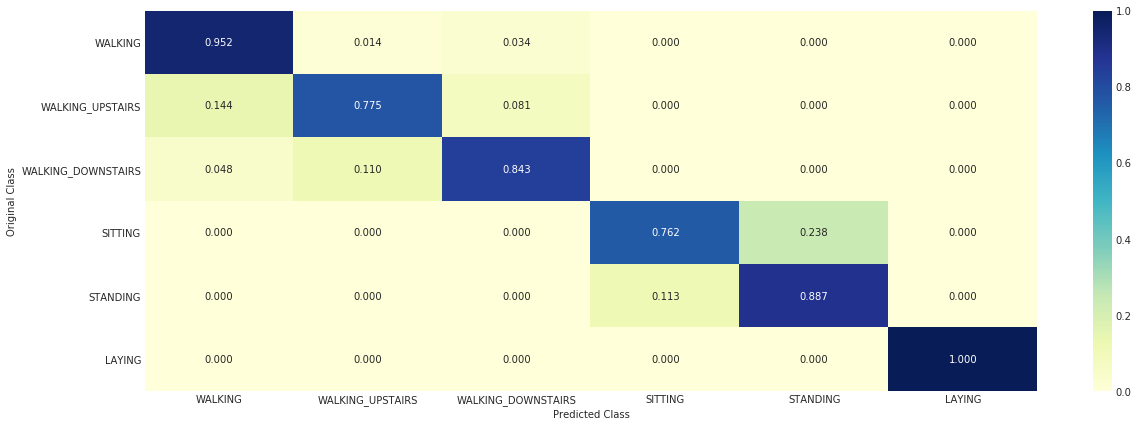

The Model of Accuracy score: 0.8734306073973532
<function confusion_matrix at 0x00000207705417B8>


In [145]:
clf=DecisionTreeClassifier(max_depth=9)
train=clf.fit(X_train_data,Y_train_data)
predict=clf.predict(X_test_data)
test_accuracy=accuracy_score(Y_test_data,predict)
plot_confusion_matrix(Y_test_data,predict)
print("The Model of Accuracy score:",test_accuracy)
print(confusion_matrix)

# 5. Random Forest Classifier with GridSearch

In [151]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
grid_result=rfc_grid.fit(X_train_data,Y_train_data)

In [152]:
grid_result.best_params_

{'max_depth': 9, 'n_estimators': 190}

-------------------- Confusion matrix --------------------
-------------------- Precision matrix (Columm Sum=1) --------------------


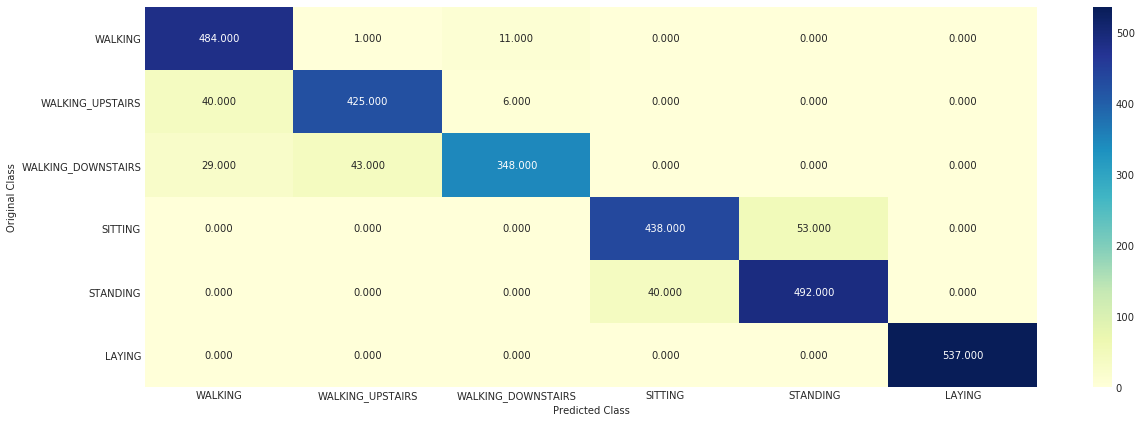

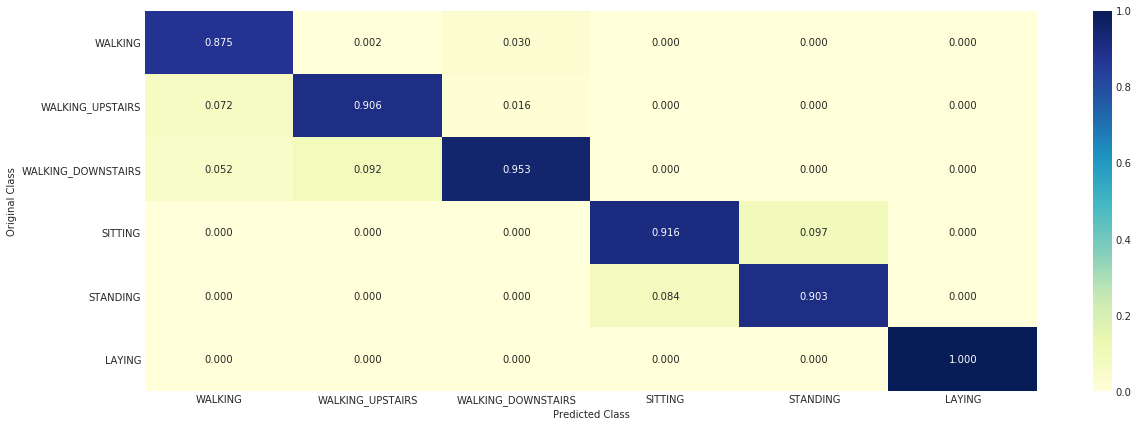

-------------------- Recall matrix (Row sum=1) --------------------


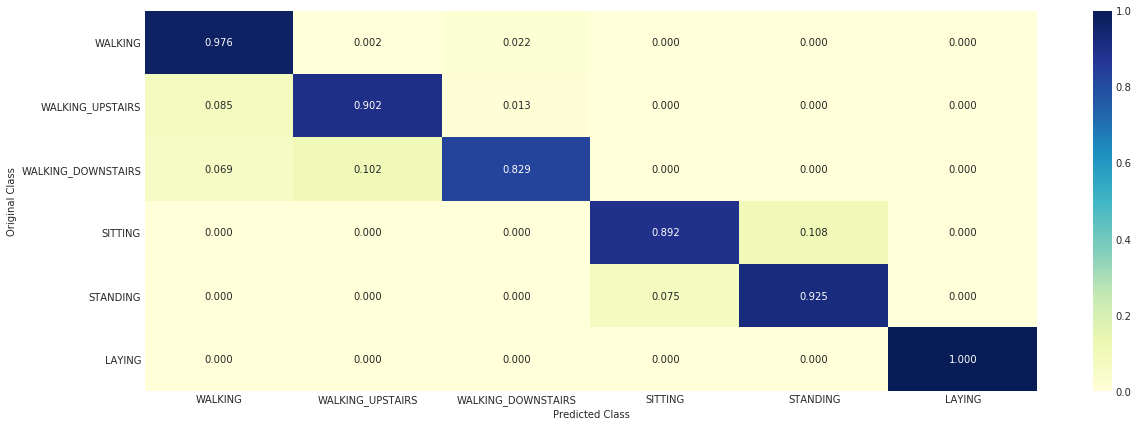

The Model of Accuracy score: 0.9243298269426535
<function confusion_matrix at 0x00000207705417B8>


In [154]:
clf=RandomForestClassifier(n_estimators=190,-max_depth=9)
train=clf.fit(X_train_data,Y_train_data)
predict=clf.predict(X_test_data)
test_accuracy=accuracy_score(Y_test_data,predict)
plot_confusion_matrix(Y_test_data,predict)
print("The Model of Accuracy score:",test_accuracy)
print(confusion_matrix)

## Conclusion

In [1]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Si.no.","model","Accuracy"]
x.add_row(["1","Logistic Regression","0.95792"])
x.add_row(["2","Linear-svm","0.96538"])
x.add_row(["3","RBF Kernel svm","0.9619"])
x.add_row(["4","Decision tree","0.87343"])
x.add_row(["5","RandomForest","0.9243"])

print(x)

+--------+---------------------+----------+
| Si.no. |        model        | Accuracy |
+--------+---------------------+----------+
|   1    | Logistic Regression | 0.95792  |
|   2    |      Linear-svm     | 0.96538  |
|   3    |    RBF Kernel svm   |  0.9619  |
|   4    |    Decision tree    | 0.87343  |
|   5    |     RandomForest    |  0.9243  |
+--------+---------------------+----------+


> Thus Linear SVM and Logistic Regression perform good with the domain based features

## Applying Deep Learning Technique

In [57]:
from keras.models import Sequential
from keras import backend as k
from keras.layers.core import Dense,Dropout
import tensorflow as tf
from keras.layers import LSTM
from keras import backend as K

## Loading the datset for applying LSTM

In [6]:
#Raw Features
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]


In [7]:
def read_csv(filename):
    return pd.read_csv(filename,delim_whitespace=True, header=None)
def load_signal(subset):
    signal_array=[]
    for signal in SIGNALS:
        filename=f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signal_array.append(read_csv(filename))
        
    return signal_array
    

In [34]:
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values)

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [45]:
def load_labels(subset):
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    return pd.get_dummies(y).values

## Setting Train and Test data

In [47]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_labels('train'), load_labels('test')

    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, Y_train, Y_test = load_data()

## Setting parameter 

In [50]:
#setting parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [53]:
#Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [56]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [58]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [65]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


## Adding Layers for LSTM

In [68]:
model=Sequential()
model.add(LSTM(n_hidden,input_shape=(128,9)))
model.add(Dropout(0.5))
model.add(Dense(6,activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [71]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
model.fit(X_train,Y_train, batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 69s 9ms/step - loss: 1.3435 - acc: 0.4559 - val_loss: 1.1676 - val_acc: 0.4856
Epoch 2/30
7352/7352 [==============================] - 63s 9ms/step - loss: 1.0317 - acc: 0.5331 - val_loss: 1.0048 - val_acc: 0.5487
Epoch 3/30
7352/7352 [==============================] - 63s 9ms/step - loss: 0.8836 - acc: 0.5937 - val_loss: 0.8473 - val_acc: 0.6356
Epoch 4/30
7352/7352 [==============================] - 63s 9ms/step - loss: 0.7554 - acc: 0.6498 - val_loss: 0.7695 - val_acc: 0.6481
Epoch 5/30
7352/7352 [==============================] - 63s 9ms/step - loss: 0.8238 - acc: 0.6394 - val_loss: 0.8546 - val_acc: 0.6206
Epoch 6/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.7465 - acc: 0.6348 - val_loss: 1.0166 - val_acc: 0.6105
Epoch 7/30
7352/7352 [==============================] - 63s 9ms/step - loss: 0.7039 - acc: 0.6

## Evaluating the model

In [72]:
model.evaluate(X_test,Y_test)

2947/2947 [==============================] - 3s 848us/step


[0.48553241970916483, 0.8815744825246012]

## Conclusion:
> Thus applying the raw timebased with 128 window of 9features using LSTM provides us 0.8815 accuracy
1. "body_acc_x"
2. "body_acc_y"
3. "body_acc_z"
4. "body_gyro_x"
5. "body_gyro_y"
6. "body_gyro_z"
7. "total_acc_x"
8.  "total_acc_y"
9. "total_acc_z"

The above are nine timeseries features of classifying 6 class label